In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import datasets, tree
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
%matplotlib inline

## Data Preprocessing

In [3]:
df = pd.read_csv('diabetes.csv')

# replace 0s with means of columns
c = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
impute = SimpleImputer(missing_values=0, strategy='mean')
no_zeros_df = df.copy()
no_zeros_df[c] = impute.fit_transform(df[c])

feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = no_zeros_df[feature_cols]
y = no_zeros_df['Outcome']

# normalize training and testing
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
X_normalized_train, X_normalized_test, y_normalized_train, y_normalized_test = train_test_split(X_normalized, y, test_size=0.25, random_state=4)

# predictions from each classifier (for plotting ROC curves)
predictions = {} # classifier => predictions

## KNN

In [4]:
# KNN classifier, and find the optimal k and accuracy

#create a accuracy list which uses to store knn accuracy values from k in range of 1 to 59
knn_accuracy = []

highest_accuracy = 0
for k in range (1,59):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_normalized_train, y_normalized_train)
    y_predict_knn = knn.predict(X_normalized_test)
    knn_accuracy_score=accuracy_score(y_normalized_test, y_predict_knn)
    if knn_accuracy_score > highest_accuracy:
        highest_accuracy = knn_accuracy_score
        predictions['KNN'] = y_predict_knn
    knn_accuracy.append(knn_accuracy_score)

#find best accuracy value 
max_knn_accuracy = np.amax(knn_accuracy)

#find the index of best accuracy value 
index_max_knn_accuracy = np.where(knn_accuracy == np.amax(knn_accuracy))

print('The optimal value of k is '+ str(index_max_knn_accuracy[0][0]+1))
print('The max accuracy of knn is ' + str(max_knn_accuracy))

#applying 10-fold cross validation on KNN classifier, and find the optimal k and accuracy

#create a accuracy list which uses to store knn accuracy values from k in range of 1 to 59
knn_accuracy_cvs = []

for k in range(1,59):
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy_list_knn = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    accuracy_cv_knn = accuracy_list_knn.mean()
    knn_accuracy_cvs.append( accuracy_cv_knn)
    
#find best accuracy value    
max_knn_accuracy_cvs = np.amax(knn_accuracy_cvs)

#find the index of best accuracy value 
index_max_knn_accuracy_cvs = np.where(knn_accuracy_cvs == np.amax(knn_accuracy_cvs))

print('The optimal value of k in 10 fold cvs is '+ str(index_max_knn_accuracy_cvs[0][0]+1))
print('The max accuracy of knn in 10 fold cvs is ' + str(max_knn_accuracy_cvs))

The optimal value of k is 28
The max accuracy of knn is 0.8020833333333334
The optimal value of k in 10 fold cvs is 53
The max accuracy of knn in 10 fold cvs is 0.7488721804511279


In [5]:
## Decision Tree

Accuracy of Descion Tree Classifier: 0.807.
The accuracy of decion tree classifier in 10 fold cvs is 0.729.
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       126
           1       0.71      0.74      0.73        66

    accuracy                           0.81       192
   macro avg       0.79      0.79      0.79       192
weighted avg       0.81      0.81      0.81       192

[[106  20]
 [ 17  49]]
|--- feature_1 <= 127.50
|   |--- feature_7 <= 28.50
|   |   |--- class: 0
|   |--- feature_7 >  28.50
|   |   |--- feature_5 <= 26.80
|   |   |   |--- class: 0
|   |   |--- feature_5 >  26.80
|   |   |   |--- feature_4 <= 112.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  112.00
|   |   |   |   |--- feature_6 <= 0.62
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  0.62
|   |   |   |   |   |--- class: 1
|--- feature_1 >  127.50
|   |--- feature_5 <= 29.95
|   |   |--- class: 0
|   |--- feature_5 >  29

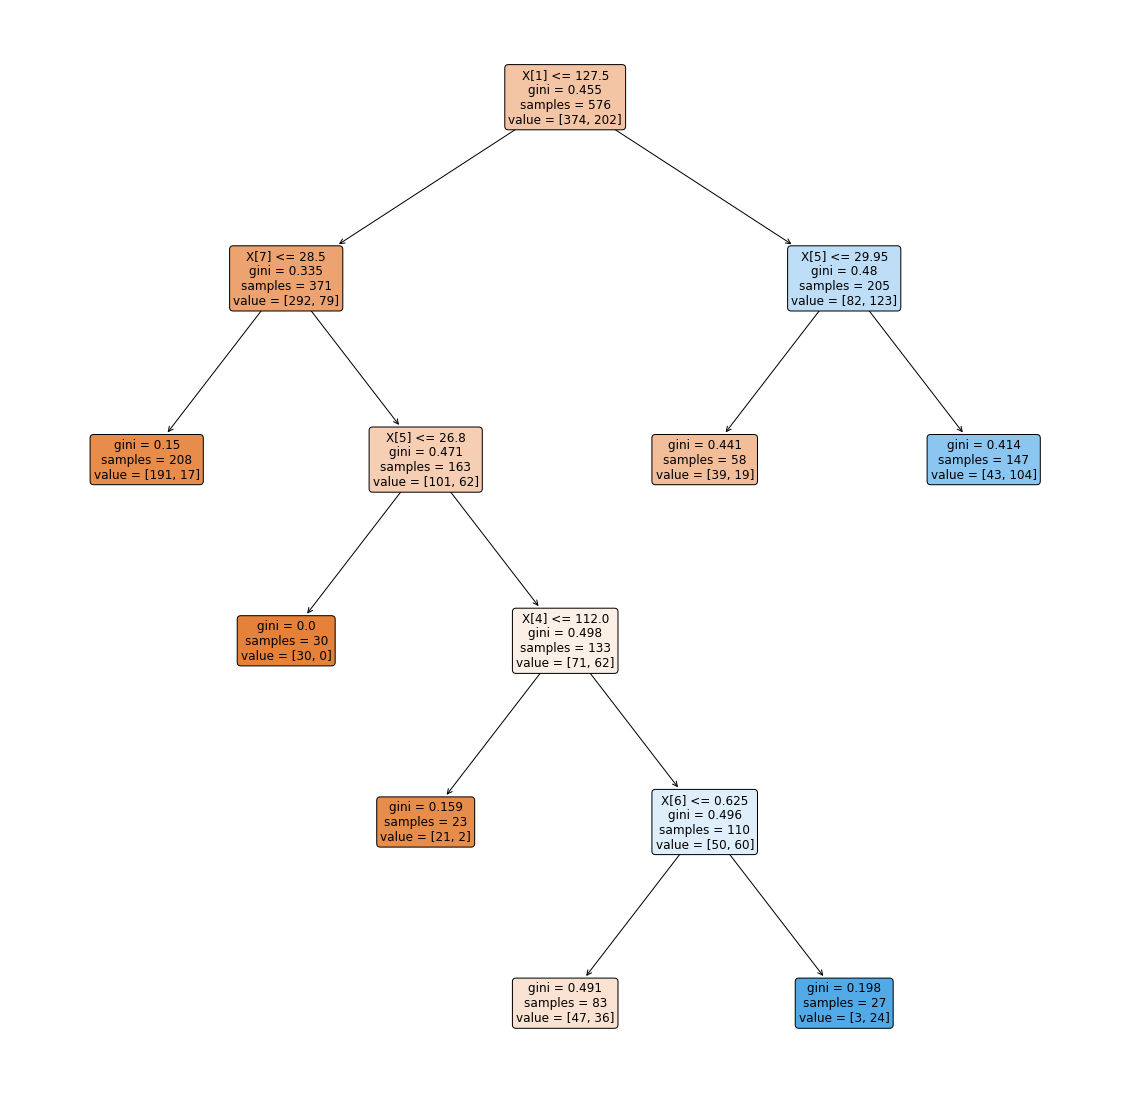

In [6]:
# Decision Tree Classifier

decisiontree = DecisionTreeClassifier(ccp_alpha=0.01) # prune our decision tree to make it more efficient
# decisiontree = DecisionTreeClassifier() # produces large results when fitting
decisiontree.fit(X_train, y_train)
y_predict_dt = decisiontree.predict(X_test)
score_dt = accuracy_score(y_test, y_predict_dt)

predictions['Decision Tree'] = y_predict_dt

print("Accuracy of Descion Tree Classifier: " + str(round(score_dt, 3)) + ".")
accuracy_dt = cross_val_score(decisiontree, X, y, cv=10, scoring='accuracy')
print("The accuracy of decion tree classifier in 10 fold cvs is " + str(round(accuracy_dt.mean(),3)) + ".")

## The classification report lets us know True Positives, False Positives, True negatives and False Negatives.
## Precision - What percent of your predictions were correct?
## Recall – What percent of the positive cases did you catch? 
## F1 score – What percent of positive predictions were correct? 
## Support - The number of actual occurrences of the class in the specified dataset.
print(classification_report(y_test, y_predict_dt))

# Confusion Matrix simply lets us know the accuracy of our predictions by calculating the following:
# True positives (TP), False positives (FP), True negatives (TN), False negatives (FN)
print(confusion_matrix(y_test, y_predict_dt, labels=[0,1]))

# Descion Tree Visualization
model = decisiontree.fit(X_train, y_train)
text_dt = tree.export_text(model)
print(text_dt)

# Plots the decision tree 
fig = plt.figure(figsize=(20,20))
# fig = plt.figure(figsize=(50,50)) # if we prune our descion tree
tree.plot_tree(model, filled = True, fontsize = 12, rounded = True)
plt.show()

In [7]:
# the output matches with the tree above, which only uses 3 features (glucose, BMI, then age)
for feature, weight in zip(feature_cols, decisiontree.tree_.compute_feature_importances(normalize=False)):
    print(f"{feature} ------------------------------ {weight}")

Pregnancies ------------------------------ 0.0
Glucose ------------------------------ 0.06868689113923002
BloodPressure ------------------------------ 0.0
SkinThickness ------------------------------ 0.0
Insulin ------------------------------ 0.013885174068240426
BMI ------------------------------ 0.039311815197082156
DiabetesPedigreeFunction ------------------------------ 0.014654577907589969
Age ------------------------------ 0.02829910672547446


In [8]:
my_logreg = LogisticRegression()
my_logreg.fit(X_train, y_train)
y_predict_lr = my_logreg.predict(X_test)
score_lr = accuracy_score(y_test, y_predict_lr)
print(score_lr)

predictions['Logistic Regression'] = y_predict_lr

0.7864583333333334


c:\Users\Charlie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train, y_train)
rf_predict = my_RandomForest.predict(X_test)
rf_score = accuracy_score(y_test, rf_predict)
print(rf_score)

predictions['Random Forest'] = rf_predict

0.8020833333333334


In [10]:
my_KMeans = KMeans(n_clusters=2, random_state=6)
my_KMeans.fit(X_train)
results = my_KMeans.predict(X_test)

# the 1s and 0s from kmeans aren't predicting diabetes; they are cluster labels (cluster0 and cluster1)
# to perform classification, assign a prediction label to each cluster

# for each cluster, get the label of each data point to find the majority label for that cluster
# e.g. if cluster0 contains mostly data points where outcome = 1, then cluster0 is diabetes
m = {0: {0:0, 1:0}, 1: {0:0, 1:0}} # cluster_label => {0: number of zero labels, 1: number of one labels}
for cluster_label, label in zip(results, y_test):
    m[cluster_label][label] += 1

# map the majority label to the cluster label
for k in m:
    m[k] = max(m[k], key=m[k].get)

# replace cluster labels with majority labels
for i in range(len(results)):
    results[i] = m[results[i]]

print(accuracy_score(y_test, results))

predictions['KMeans'] = results

# cross validation for kmeans
accuracy_list = []
kf = KFold(n_splits=10, random_state=6, shuffle=True)
for train_index, test_index in kf.split(no_zeros_df):
    # split into training and testing
    train, test = no_zeros_df.iloc[train_index], no_zeros_df.iloc[test_index]
    kmeans_X_train, kmeans_X_test, kmeans_y_train, kmeans_y_test = train[feature_cols], test[feature_cols], train['Outcome'], test['Outcome']

    # normalize training and testing
    scaler = StandardScaler()
    kmeans_X_train = scaler.fit_transform(kmeans_X_train)
    kmeans_X_test = scaler.transform(kmeans_X_test)

    my_KMeans = KMeans(n_clusters=2, random_state=6)
    my_KMeans.fit(kmeans_X_train)
    results = my_KMeans.predict(kmeans_X_test)

    # for each cluster, get the label of each data point to find the majority label for that cluster
    # e.g. if cluster0 contains mostly data points where outcome = 1, then cluster0 is diabetes
    m = {0: {0:0, 1:0}, 1: {0:0, 1:0}} # cluster_label => {0: number of zero labels, 1: number of one labels}
    for cluster_label, label in zip(results, kmeans_y_test):
        m[cluster_label][label] += 1
    print(m)

    # map the majority label to the cluster label
    for k in m:
        m[k] = max(m[k], key=m[k].get)
    print(m)

    # replace cluster labels with majority labels
    for i in range(len(results)):
        results[i] = m[results[i]]

    accuracy_list.append(accuracy_score(kmeans_y_test, results))

print(accuracy_list)

0.6614583333333334
{0: {0: 36, 1: 9}, 1: {0: 14, 1: 18}}
{0: 0, 1: 1}
{0: {0: 36, 1: 5}, 1: {0: 17, 1: 19}}
{0: 0, 1: 1}
{0: {0: 20, 1: 19}, 1: {0: 30, 1: 8}}
{0: 0, 1: 0}
{0: {0: 15, 1: 15}, 1: {0: 40, 1: 7}}
{0: 0, 1: 0}
{0: {0: 29, 1: 6}, 1: {0: 19, 1: 23}}
{0: 0, 1: 1}
{0: {0: 38, 1: 6}, 1: {0: 6, 1: 27}}
{0: 0, 1: 1}
{0: {0: 10, 1: 24}, 1: {0: 32, 1: 11}}
{0: 1, 1: 0}
{0: {0: 36, 1: 3}, 1: {0: 19, 1: 19}}
{0: 0, 1: 0}
{0: {0: 19, 1: 20}, 1: {0: 30, 1: 7}}
{0: 1, 1: 0}
{0: {0: 36, 1: 9}, 1: {0: 18, 1: 13}}
{0: 0, 1: 0}
[0.7012987012987013, 0.7142857142857143, 0.6493506493506493, 0.7142857142857143, 0.6753246753246753, 0.8441558441558441, 0.7272727272727273, 0.7142857142857143, 0.6578947368421053, 0.7105263157894737]


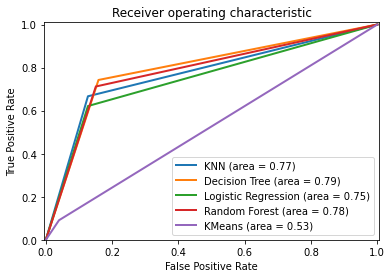

In [11]:
plt.figure()

for classifier, prediction in predictions.items():
    fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction, pos_label=1)
    AUC = metrics.auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{classifier} (area = %0.2f)' % AUC)

plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()